# Descrição do Experimento

Algoritmo Genético utilizando representação binária do cromossomo. O valor zero representa que o vértice não participa da solução e o valor um, por outro lado, participa.

O tamanho do cromossomo é igual ao número de vértices não obrigatórios da instância do problema considerada (dataset), ou seja, é igual o número total de vértices subtraido a quantidade de vértices terminais.

Operação de cruzamento baseada em dois pontos de corte escolhidos aleatoriamente para cada chamada do método.
Foi utilizada a operação de mutação *bit flip*.

Para todas as instâncias do problema foram utilizados os parâmetros:

    - Nro. de execuções = 30
    - Tamanho população = 100
    - Taxa de cruzamento = 0.85
    - Taxa de mutação = 0.2
    - A inicialização da população é puramente aleatória.
    
    - Critério de parada: atingir o número máximo de iterações.
        - Atingir o número máximo de iterações: 10.000
        - Estagnação: não apresenta melhora do fitness nas últimas 500 gerações.
        - Atingir o máximo global previsto.
   
Veja implementação [check_stop_criterions](https://github.com/GiliardGodoi/ppgi-steiner-tree-gpx/blob/fb1801c118c6c51b2b874c2111975f43ffa8b509/ga_binary.py#L418)

O código da simulação se refere ao seguinte [*commit*](https://github.com/GiliardGodoi/ppgi-steiner-tree-gpx/tree/fb1801c118c6c51b2b874c2111975f43ffa8b509)

As instâncias consideradas se referem aos da classe B (steinb1.txt ... steinb18.txt) da OR-Library.

Trata-se de uma análise exploratória dos dados gerados no qual tentou se responder algumas perguntas:

    1. Convergência: quantidade de gerações;
    2. Frequência das soluções ótimas;
    3. Tempo de execução;
    4. Soluções que sofreram penalização.

In [1]:
# CONFIGURAÇÕES INICIAIS DO NOTEBOOK
import os

# Importando bibliotecas para análise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização dos dados
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Algumas funções da biblioteca seaborn (sns) possui um parâmetro para determinarmos a ordem que 
# atributos categóricos serão plotados em um dos exios (x ou y) do gráfico
# categorial_order é para garantir que os dados serão plotados na mesma ordem
# [B1, B2, B3, ... B17, B18]

# Sem esse parâmetro os dados seriam plotados na ordem alfabética das strings do atributo instance_problem
# [B1, B11, B12 ... B17, B18, B2, B3, ... B9 ] o que não é desejável.

categorical_order = ["B{0}".format(i) for i in range(1,19)]

## Carregando os dados sobre as simulações [simulation.csv]

In [3]:
def read_data(simulationfolder, filetemplate, mintrial=1, maxtrial=30):
    MAIN_FOLDER = os.path.join("..", "outputdata", simulationfolder)
 
    # simulations: diretórios que contem os dados para cada um dos datasets.
    # ['B1', 'B2', 'B3' ... ]
    simulations = os.listdir(MAIN_FOLDER)
  

    # ARQUIVO PRINCIPAL: INDICA QUAL DADOS ESTAMOS ANALISANDO.
    # Cada execução (trial) gera um arquivo diferente. 
    # files: é um array com o nome dos trinta  arquivos
    files = [filetemplate.format(i) for i in range(mintrial,maxtrial+1)]

    #all_data_pieces: contém os DataFrames para cada um dos 30 arquivos (trials) dos 18 datasets 
    data_pieces = [ 
        pd.read_csv(os.path.join(MAIN_FOLDER, folder, file))
            for folder in simulations 
                for file in files          
    ]

    # concatena (junta) todos os DataFrames em um só
    return pd.concat(data_pieces, ignore_index=True)

In [4]:
%%time
raw_data = read_data("20200330_kapsalis_random", "trial_{0}_simulation.csv")
raw_data.head()

Wall time: 17.6 s


,nro_trial,instance_problem,nro_nodes,nro_edges,nro_terminals,tx_crossover,tx_mutation,global_optimum,best_cost,best_fitness,population_size,max_generation,iterations,run_time,max_last_improvement,why_stopped
0,1,B1,50,63,9,0.85,0.2,82,85,410,100,10000,741,66.162495,500,stagnation
1,2,B1,50,63,9,0.85,0.2,82,84,291,100,10000,959,60.729615,500,stagnation
2,3,B1,50,63,9,0.85,0.2,82,83,308,100,10000,1339,76.604051,500,stagnation
3,4,B1,50,63,9,0.85,0.2,82,85,203,100,10000,1528,85.964846,500,stagnation
4,5,B1,50,63,9,0.85,0.2,82,82,218,100,10000,498,29.327297,500,global_optimum_reached


In [5]:
## Organizando os dados em uma tabela principal
selected_columns = ["instance_problem", "nro_nodes", "nro_edges", "nro_terminals", "global_optimum"]
frame = raw_data[selected_columns].drop_duplicates()  \
                                    .set_index("instance_problem") \
                                    .reindex(categorical_order, axis=0)

In [6]:
basic_stats = ['mean','std' ,'min', 'max']
grouped = raw_data.groupby("instance_problem")

In [7]:
frame.columns = pd.MultiIndex.from_tuples([("graph", col) for col in frame.columns])
frame2 = frame.join(
        grouped[["best_cost", "iterations", "run_time"]] \
        .agg(['mean', 'std']) \
        .reindex(categorical_order)
    ).round(2)

frame2

graph                                        best_cost  \
                 nro_nodes nro_edges nro_terminals global_optimum      mean   
instance_problem                                                              
B1                      50        63             9             82     84.53   
B2                      50        63            13             83     84.17   
B3                      50        63            25            138    138.00   
B4                      50       100             9             59     63.40   
B5                      50       100            13             61     61.93   
B6                      50       100            25            122    122.13   
B7                      75        94            13            111    126.77   
B8                      75        94            19            104    108.60   
B9                      75        94            38            220    220.63   
B10                     75       150            13             86     95.43   
B11                     75       150            19             88     97.37   
B12                     75       150            38            174    174.10   
B13                    100       125            17            165    193.13   
B14                    100       125            25            235    244.83   
B15                    100       125            50            318    321.90   
B16                    100       200            17            127    150.00   
B17                    100       200            25            131    137.17   
B18                    100       200            50            218    218.77   

                       iterations         run_time          
                   std       mean     std     mean     std  
instance_problem                                            
B1                2.13    1116.33  446.47    64.98   24.55  
B2                2.38     738.13  286.65    42.23   16.55  
B3                0.00      84.67   49.98     6.85    4.33  
B4                1.94    1008.90  350.96    68.00   23.38  
B5                0.74     753.50  251.76    56.09   18.72  
B6                0.51     278.33  201.36    26.76   19.27  
B7                7.29    1364.37  399.67   102.79   28.65  
B8                2.82    1203.20  327.59    92.61   24.44  
B9                1.00     606.60  305.11    70.38   35.23  
B10               4.45    1180.47  301.10   102.49   25.31  
B11               3.00    1139.60  385.51   108.59   34.34  
B12               0.31     407.73  220.47    64.84   35.08  
B13               7.86    1505.00  409.12   155.26   39.84  
B14               3.74    1449.30  348.64   179.36   42.92  
B15               2.25    1227.77  357.44   180.68   53.50  
B16               6.69    1461.90  383.80   175.85   46.65  
B17               2.87    1331.03  297.29   340.76  118.19  
B18               0.57     753.43  234.97   252.08   97.03

In [51]:
# frame2.to_csv(os.path.join("..", "outputdata", "processed", "ga_binary.csv"))

## Análise Exploratória dos Dados

A análise realizada aqui se refere aos dados do arquivo `trial_{0}_simulation.csv`

As análises referem ao variação do melhor custo encontrado, iterações executadas e critério de parada satisfeito. 

Em um segundo momento é feito uma análise desses mesmos fatores considerando as razões de parada do GA em separado.


### Variação do melhor custo atingido (best_cost)

In [8]:
frame2[["graph", "best_cost"]]

graph                                        best_cost  \
                 nro_nodes nro_edges nro_terminals global_optimum      mean   
instance_problem                                                              
B1                      50        63             9             82     84.53   
B2                      50        63            13             83     84.17   
B3                      50        63            25            138    138.00   
B4                      50       100             9             59     63.40   
B5                      50       100            13             61     61.93   
B6                      50       100            25            122    122.13   
B7                      75        94            13            111    126.77   
B8                      75        94            19            104    108.60   
B9                      75        94            38            220    220.63   
B10                     75       150            13             86     95.43   
B11                     75       150            19             88     97.37   
B12                     75       150            38            174    174.10   
B13                    100       125            17            165    193.13   
B14                    100       125            25            235    244.83   
B15                    100       125            50            318    321.90   
B16                    100       200            17            127    150.00   
B17                    100       200            25            131    137.17   
B18                    100       200            50            218    218.77   

                        
                   std  
instance_problem        
B1                2.13  
B2                2.38  
B3                0.00  
B4                1.94  
B5                0.74  
B6                0.51  
B7                7.29  
B8                2.82  
B9                1.00  
B10               4.45  
B11               3.00  
B12               0.31  
B13               7.86  
B14               3.74  
B15               2.25  
B16               6.69  
B17               2.87  
B18               0.57

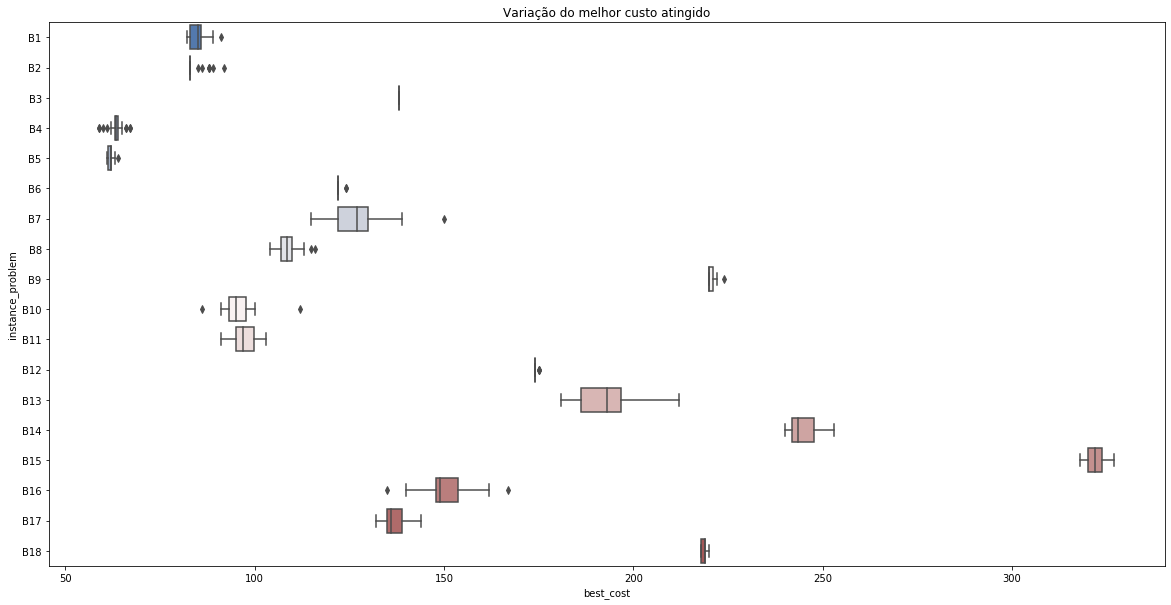

In [9]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do melhor custo atingido')
# sns.set(style="darkgrid")

sns.boxplot(x="best_cost", 
            y="instance_problem",
            data=raw_data,
            order=categorical_order,
            palette="vlag",
           )

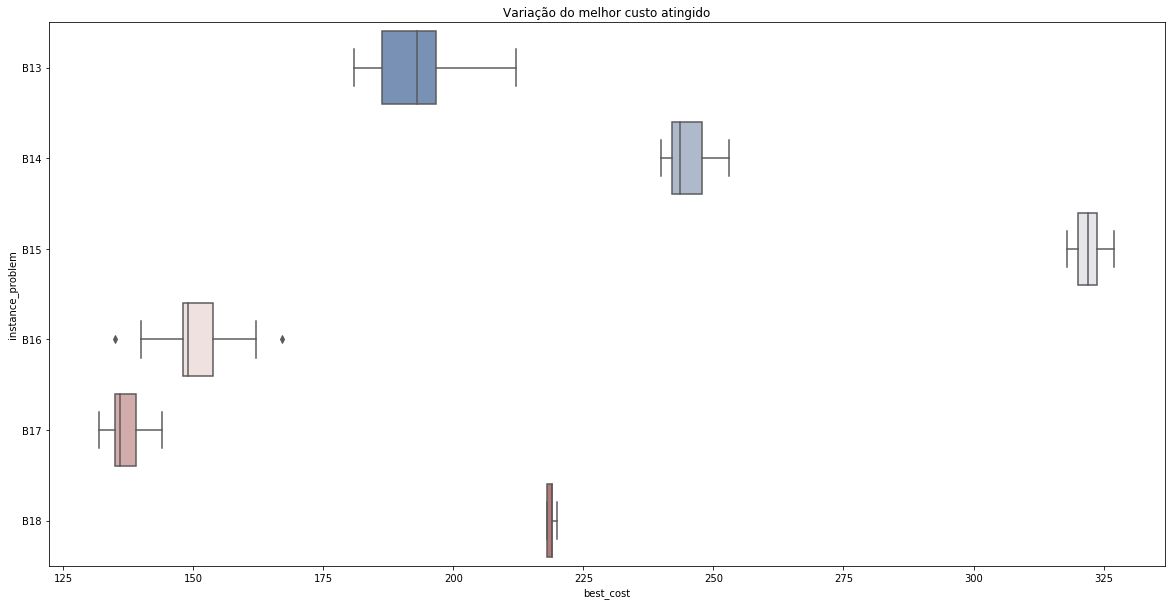

In [10]:
selected_problems = [f"B{nro}" for nro in range(13,19)]

df = raw_data[raw_data["instance_problem"].isin(selected_problems)]

fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do melhor custo atingido')
# sns.set(style="darkgrid")

sns.boxplot(x="best_cost", 
            y="instance_problem",
            data=df,
            order=selected_problems,
            palette="vlag",
           )

### Variação do número de gerações (iterações)

In [11]:
frame2[["graph", "iterations"]]

graph                                        iterations  \
                 nro_nodes nro_edges nro_terminals global_optimum       mean   
instance_problem                                                               
B1                      50        63             9             82    1116.33   
B2                      50        63            13             83     738.13   
B3                      50        63            25            138      84.67   
B4                      50       100             9             59    1008.90   
B5                      50       100            13             61     753.50   
B6                      50       100            25            122     278.33   
B7                      75        94            13            111    1364.37   
B8                      75        94            19            104    1203.20   
B9                      75        94            38            220     606.60   
B10                     75       150            13             86    1180.47   
B11                     75       150            19             88    1139.60   
B12                     75       150            38            174     407.73   
B13                    100       125            17            165    1505.00   
B14                    100       125            25            235    1449.30   
B15                    100       125            50            318    1227.77   
B16                    100       200            17            127    1461.90   
B17                    100       200            25            131    1331.03   
B18                    100       200            50            218     753.43   

                          
                     std  
instance_problem          
B1                446.47  
B2                286.65  
B3                 49.98  
B4                350.96  
B5                251.76  
B6                201.36  
B7                399.67  
B8                327.59  
B9                305.11  
B10               301.10  
B11               385.51  
B12               220.47  
B13               409.12  
B14               348.64  
B15               357.44  
B16               383.80  
B17               297.29  
B18               234.97

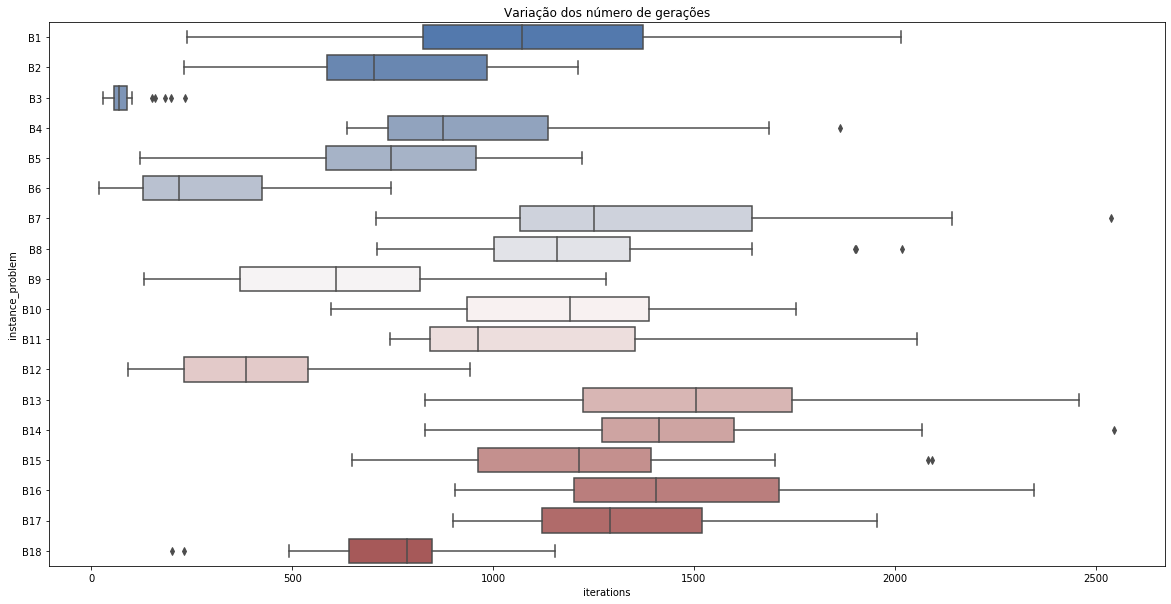

In [12]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos número de gerações')

sns.boxplot(x="iterations", 
            y="instance_problem",
            data=raw_data,
            order=categorical_order,
            palette="vlag",
           )

### Variação do tempo de execução

In [13]:
frame2[["graph", "run_time"]]

graph                                        run_time  \
                 nro_nodes nro_edges nro_terminals global_optimum     mean   
instance_problem                                                             
B1                      50        63             9             82    64.98   
B2                      50        63            13             83    42.23   
B3                      50        63            25            138     6.85   
B4                      50       100             9             59    68.00   
B5                      50       100            13             61    56.09   
B6                      50       100            25            122    26.76   
B7                      75        94            13            111   102.79   
B8                      75        94            19            104    92.61   
B9                      75        94            38            220    70.38   
B10                     75       150            13             86   102.49   
B11                     75       150            19             88   108.59   
B12                     75       150            38            174    64.84   
B13                    100       125            17            165   155.26   
B14                    100       125            25            235   179.36   
B15                    100       125            50            318   180.68   
B16                    100       200            17            127   175.85   
B17                    100       200            25            131   340.76   
B18                    100       200            50            218   252.08   

                          
                     std  
instance_problem          
B1                 24.55  
B2                 16.55  
B3                  4.33  
B4                 23.38  
B5                 18.72  
B6                 19.27  
B7                 28.65  
B8                 24.44  
B9                 35.23  
B10                25.31  
B11                34.34  
B12                35.08  
B13                39.84  
B14                42.92  
B15                53.50  
B16                46.65  
B17               118.19  
B18                97.03

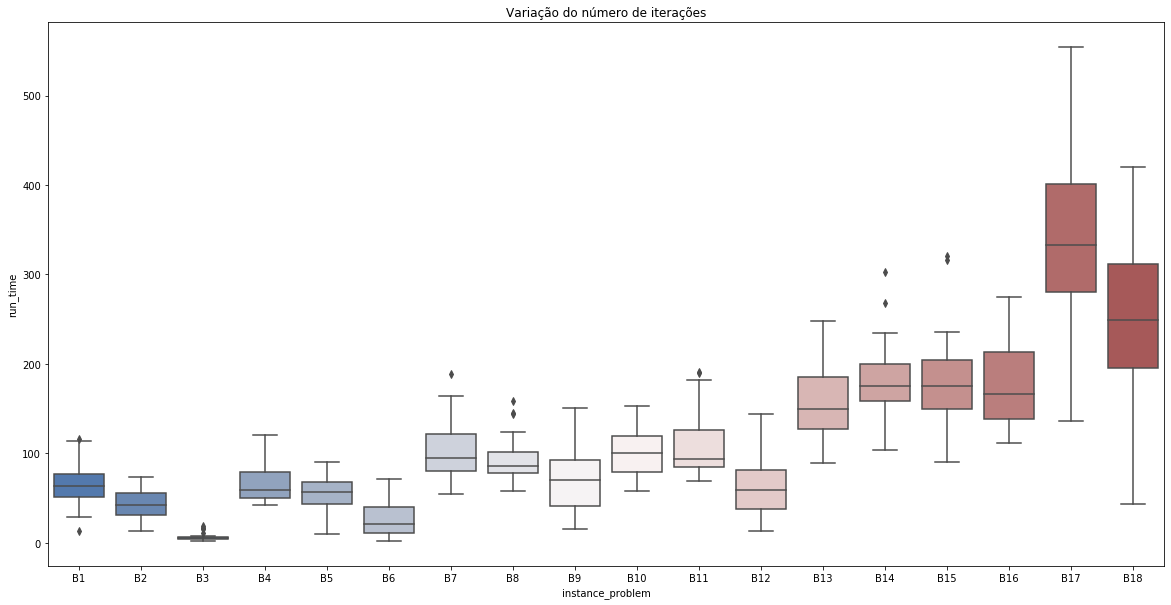

In [14]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do número de iterações')
# sns.set(style="darkgrid")

sns.boxplot(x="instance_problem", 
            y="run_time",
            data=raw_data,
            order=categorical_order,
            palette="vlag",
           )

In [15]:
frame2[frame2["iterations", "mean"] < 500.0]

graph                                        best_cost  \
                 nro_nodes nro_edges nro_terminals global_optimum      mean   
instance_problem                                                              
B3                      50        63            25            138    138.00   
B6                      50       100            25            122    122.13   
B12                     75       150            38            174    174.10   

                       iterations         run_time         
                   std       mean     std     mean    std  
instance_problem                                           
B3                0.00      84.67   49.98     6.85   4.33  
B6                0.51     278.33  201.36    26.76  19.27  
B12               0.31     407.73  220.47    64.84  35.08

---

## Análise das razões de parada

Primeiro é calculada a frequência das soluções ótimas (que atingiram o máximo global) em relação àquelas que pararam por estagnação.

Não foram observados casos onde a parada se deu por atingir o número total de iterações.

In [16]:
def porcentage(row): return (row / row.sum()) * 100

freq = raw_data.groupby(["instance_problem", "why_stopped"])['why_stopped'] \
                        .agg(['count']) \
                        .unstack() \
                        .fillna(0) \
                        .reindex(categorical_order) \
                        .apply(porcentage, axis=1) \
                        .round(2)

freq.columns = freq.columns.droplevel(0)
# freq.reset_index(0, inplace=True)

freq

why_stopped,global_optimum_reached,stagnation
instance_problem,,
B1,20.00,80.00
B2,76.67,23.33
B3,100.00,0.00
B4,6.67,93.33
B5,26.67,73.33
B6,93.33,6.67
B7,0.00,100.00
B8,6.67,93.33
B9,63.33,36.67


### Frequência das soluções ótimas

Text(0.5, 0, 'Instâncias')

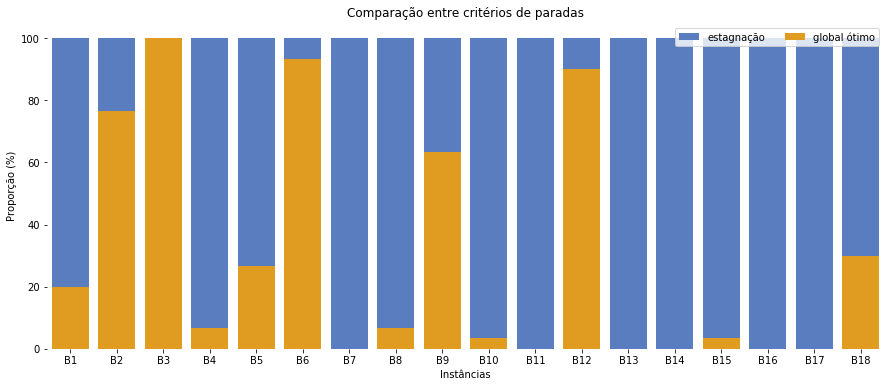

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))

fsum = freq.cumsum(axis=1).reset_index(0)

sns.set_color_codes("muted")
sns.barplot(y='stagnation', 
            x='instance_problem', 
            data=fsum,
            order=categorical_order,
            label="estagnação", color="b")


sns.barplot(y='global_optimum_reached', 
            x='instance_problem', 
            data=fsum,
            order=categorical_order,
            label="global ótimo", color="orange")


# Add a legend and informative axis label

ax.legend(ncol=2, loc="upper right", frameon=True)

sns.despine(left=True, bottom=True)

plt.title("Comparação entre critérios de paradas")
plt.ylabel("Proporção (%)")
plt.xlabel("Instâncias")

## Análise para as execuções que pararam por estagnação.

Nesta parte são analisados os dados das execuções que pararam por estagnação, isto é, não melhoraram o máximo global após 500 gerações.

In [18]:
# Selecionando os registros de interesse
dfstagnation = raw_data[raw_data["why_stopped"] == "stagnation" ]
grouped2 = dfstagnation.groupby("instance_problem")

In [19]:
dfstagnation.head()

,nro_trial,instance_problem,nro_nodes,nro_edges,nro_terminals,tx_crossover,tx_mutation,global_optimum,best_cost,best_fitness,population_size,max_generation,iterations,run_time,max_last_improvement,why_stopped
0,1,B1,50,63,9,0.85,0.2,82,85,410,100,10000,741,66.162495,500,stagnation
1,2,B1,50,63,9,0.85,0.2,82,84,291,100,10000,959,60.729615,500,stagnation
2,3,B1,50,63,9,0.85,0.2,82,83,308,100,10000,1339,76.604051,500,stagnation
3,4,B1,50,63,9,0.85,0.2,82,85,203,100,10000,1528,85.964846,500,stagnation
5,6,B1,50,63,9,0.85,0.2,82,85,126,100,10000,1914,109.850365,500,stagnation


### Variação da melhor solução encontrada até a parada

In [20]:
frame3 = grouped2[["best_cost", "iterations", "run_time"]]\
        .agg(basic_stats)\
        .reindex(categorical_order, axis=0)\
        .dropna(how='all')\
        .round(2)

frame3["count"] = grouped2["instance_problem"].count()

frame3 = frame.join(frame3).dropna(thresh=13) # excluir B3

In [21]:
frame3[["count", "graph", "best_cost"]]

count     graph                                         \
                       nro_nodes nro_edges nro_terminals global_optimum   
instance_problem                                                          
B1                24.0        50        63             9             82   
B2                 7.0        50        63            13             83   
B4                28.0        50       100             9             59   
B5                22.0        50       100            13             61   
B6                 2.0        50       100            25            122   
B7                30.0        75        94            13            111   
B8                28.0        75        94            19            104   
B9                11.0        75        94            38            220   
B10               29.0        75       150            13             86   
B11               30.0        75       150            19             88   
B12                3.0        75       150            38            174   
B13               30.0       100       125            17            165   
B14               30.0       100       125            25            235   
B15               29.0       100       125            50            318   
B16               30.0       100       200            17            127   
B17               30.0       100       200            25            131   
B18               21.0       100       200            50            218   

                 best_cost                      
                      mean   std    min    max  
instance_problem                                
B1                   85.17  1.90   83.0   91.0  
B2                   88.00  2.24   85.0   92.0  
B4                   63.71  1.58   60.0   67.0  
B5                   62.27  0.55   62.0   64.0  
B6                  124.00  0.00  124.0  124.0  
B7                  126.77  7.29  115.0  150.0  
B8                  108.93  2.62  105.0  116.0  
B9                  221.73  0.90  221.0  224.0  
B10                  95.76  4.15   91.0  112.0  
B11                  97.37  3.00   91.0  103.0  
B12                 175.00  0.00  175.0  175.0  
B13                 193.13  7.86  181.0  212.0  
B14                 244.83  3.74  240.0  253.0  
B15                 322.03  2.16  319.0  327.0  
B16                 150.00  6.69  135.0  167.0  
B17                 137.17  2.87  132.0  144.0  
B18                 219.10  0.30  219.0  220.0

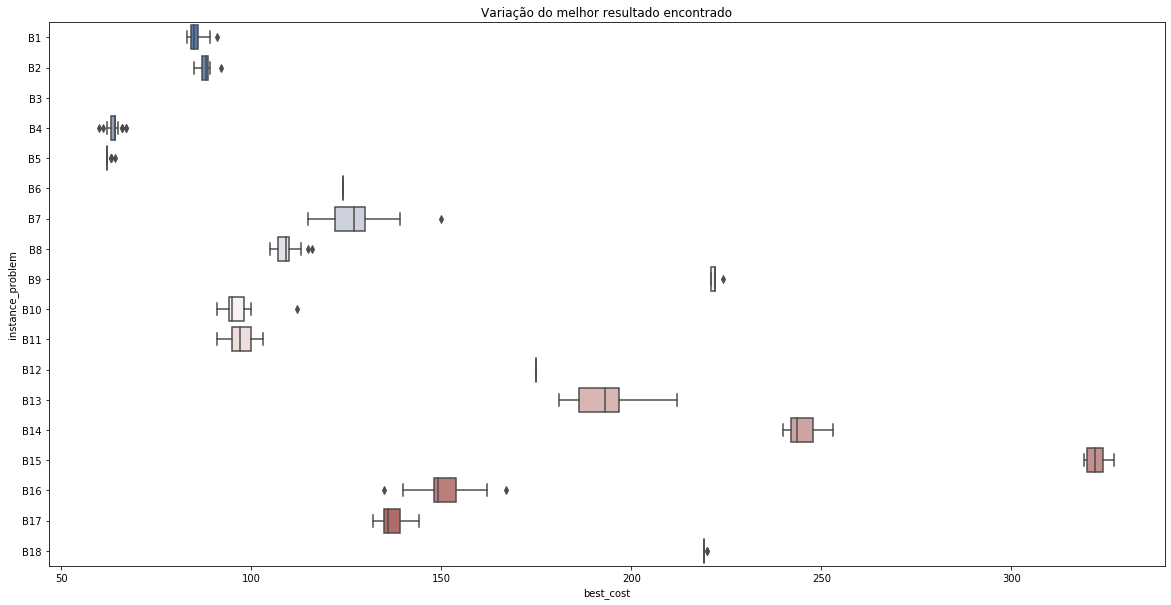

In [22]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do melhor resultado encontrado')

sns.boxplot(x="best_cost", 
            y="instance_problem",
            data=dfstagnation,
            order=categorical_order,
            palette="vlag",
           )

Text(0.5, 0, 'Melhor custo')

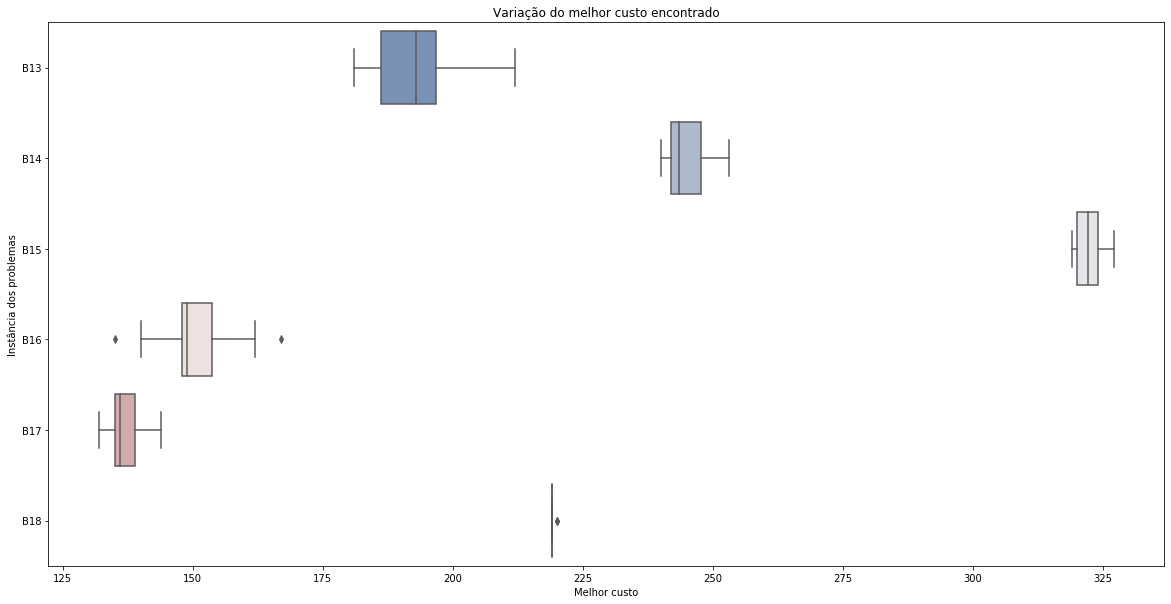

In [23]:
selected_problems = [f"B{nro}" for nro in range(13,19)]

df = dfstagnation[dfstagnation["instance_problem"].isin(selected_problems)]

fig = plt.figure(figsize=(20, 10))
# sns.set(style="darkgrid")

sns.boxplot(x="best_cost", 
            y="instance_problem",
            data=df,
            order=selected_problems,
            palette="vlag",
           )

plt.title(label='Variação do melhor custo encontrado')
plt.ylabel("Instância dos problemas")
plt.xlabel("Melhor custo")

### Variação do número de iterações

In [24]:
frame3[["count", "graph", "iterations"]]

count     graph                                         \
                       nro_nodes nro_edges nro_terminals global_optimum   
instance_problem                                                          
B1                24.0        50        63             9             82   
B2                 7.0        50        63            13             83   
B4                28.0        50       100             9             59   
B5                22.0        50       100            13             61   
B6                 2.0        50       100            25            122   
B7                30.0        75        94            13            111   
B8                28.0        75        94            19            104   
B9                11.0        75        94            38            220   
B10               29.0        75       150            13             86   
B11               30.0        75       150            19             88   
B12                3.0        75       150            38            174   
B13               30.0       100       125            17            165   
B14               30.0       100       125            25            235   
B15               29.0       100       125            50            318   
B16               30.0       100       200            17            127   
B17               30.0       100       200            25            131   
B18               21.0       100       200            50            218   

                 iterations                         
                       mean     std    min     max  
instance_problem                                    
B1                  1200.96  348.35  682.0  1970.0  
B2                   904.57  147.28  702.0  1053.0  
B4                  1010.04  363.55  636.0  1865.0  
B5                   842.05  195.58  557.0  1222.0  
B6                   628.50   21.92  613.0   644.0  
B7                  1364.37  399.67  709.0  2539.0  
B8                  1234.86  315.42  843.0  2019.0  
B9                   863.18  204.22  575.0  1280.0  
B10                 1165.62  295.04  597.0  1753.0  
B11                 1139.60  385.51  743.0  2055.0  
B12                  745.33  186.92  570.0   942.0  
B13                 1505.00  409.12  830.0  2459.0  
B14                 1449.30  348.64  831.0  2546.0  
B15                 1245.31  350.38  649.0  2093.0  
B16                 1461.90  383.80  905.0  2348.0  
B17                 1331.03  297.29  899.0  1956.0  
B18                  846.67  178.29  574.0  1155.0

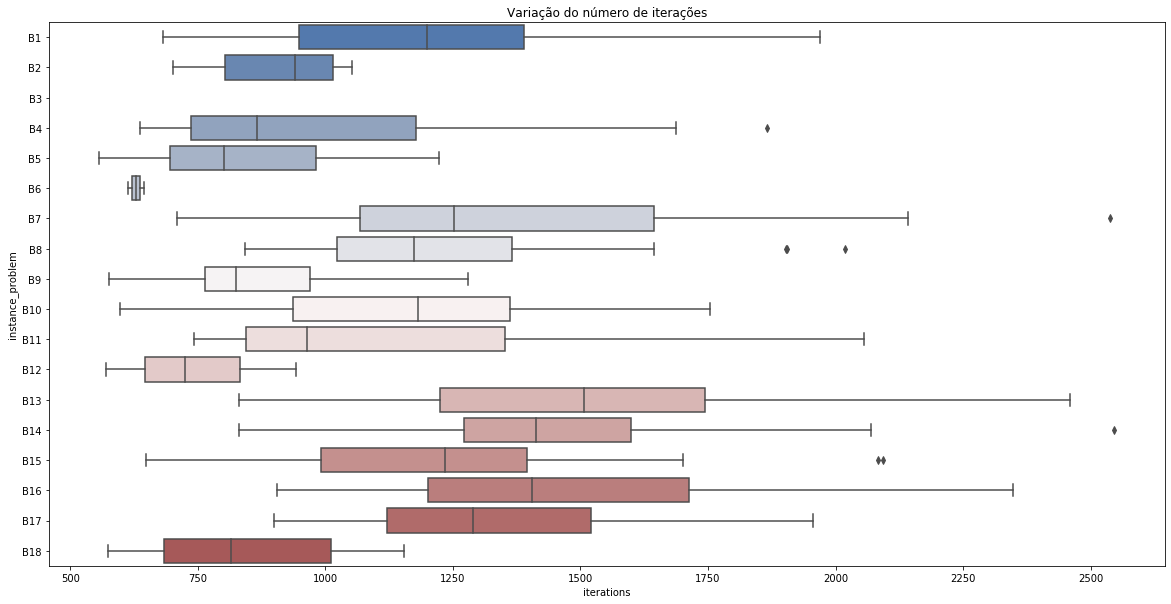

In [25]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do número de iterações')

sns.boxplot(x="iterations", 
            y="instance_problem",
            data=dfstagnation,
            order=categorical_order,
            palette="vlag",
           )

### Analisando o tempo de execução em segundos

In [26]:
frame3[["count", "graph", "run_time"]]

count     graph                                         \
                       nro_nodes nro_edges nro_terminals global_optimum   
instance_problem                                                          
B1                24.0        50        63             9             82   
B2                 7.0        50        63            13             83   
B4                28.0        50       100             9             59   
B5                22.0        50       100            13             61   
B6                 2.0        50       100            25            122   
B7                30.0        75        94            13            111   
B8                28.0        75        94            19            104   
B9                11.0        75        94            38            220   
B10               29.0        75       150            13             86   
B11               30.0        75       150            19             88   
B12                3.0        75       150            38            174   
B13               30.0       100       125            17            165   
B14               30.0       100       125            25            235   
B15               29.0       100       125            50            318   
B16               30.0       100       200            17            127   
B17               30.0       100       200            25            131   
B18               21.0       100       200            50            218   

                 run_time                          
                     mean     std     min     max  
instance_problem                                   
B1                  69.48   19.05   37.19  116.27  
B2                  50.97    8.36   37.27   59.21  
B4                  68.43   24.17   42.94  121.05  
B5                  62.72   14.57   40.44   90.99  
B6                  59.83    3.84   57.11   62.54  
B7                 102.79   28.65   55.21  189.28  
B8                  94.96   23.56   62.70  158.42  
B9                  99.06   24.31   64.99  150.43  
B10                101.37   24.99   58.42  153.50  
B11                108.59   34.34   68.88  190.95  
B12                108.43   29.69   81.28  140.13  
B13                155.26   39.84   89.46  248.32  
B14                179.36   42.92  103.61  302.94  
B15                183.30   52.44   90.71  320.91  
B16                175.85   46.65  111.83  274.45  
B17                340.76  118.19  136.28  554.21  
B18                276.99   91.92  117.83  420.21

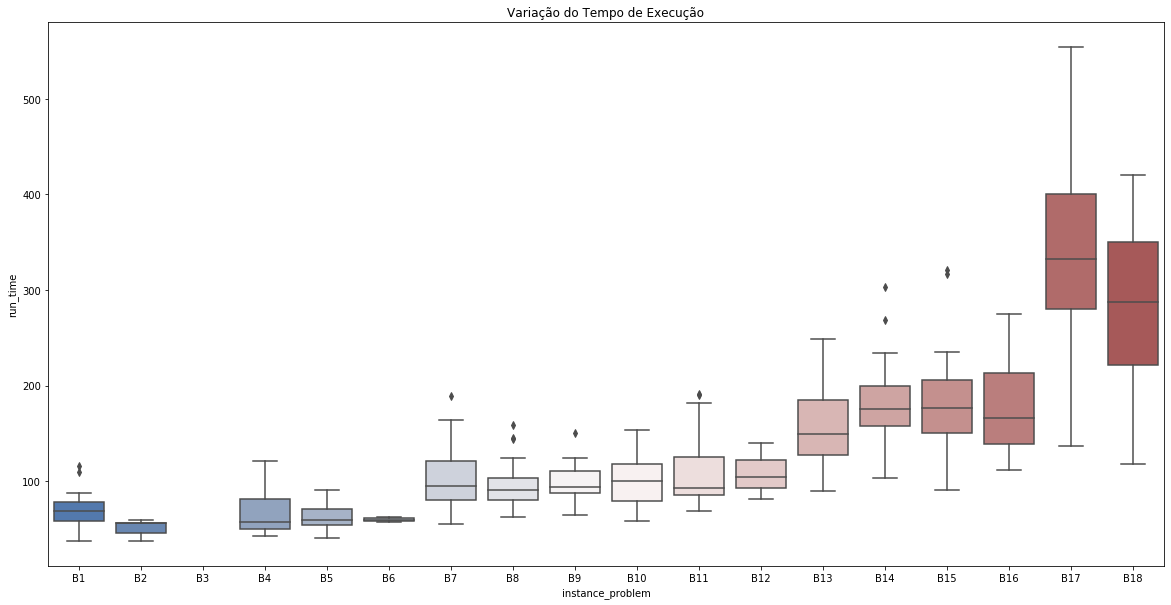

In [27]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do Tempo de Execução')

sns.boxplot(y="run_time", 
            x="instance_problem",
            data=dfstagnation,
            order=categorical_order,
            palette="vlag",
           )

---

## Análise das execuções que pararam por atingir o máximo global previsto

In [28]:
## Seleção dos dados de interesse
dfglobaloptimum = raw_data[raw_data["why_stopped"] == 'global_optimum_reached' ]
groupped3 = dfglobaloptimum.groupby('instance_problem')

# dfglobaloptimum.head()

In [29]:
frame4 = groupped3[["best_cost", "iterations", "run_time"]]\
                .agg(basic_stats)\
                .reindex(categorical_order, axis=0)\
                .dropna(how='all')\
                .round(2)

frame4['count'] = groupped3['instance_problem'].count()

frame4 = frame.join(frame4).dropna(thresh=13).fillna(0)

### Variação do número de iterções para as execuções que atingiram o ótimo global

No gráfico abaixo mostra a variação do número de iterações para as execuções que atingiram o ótimo global.

Lembrar que o número de registro da presente situação é diferente (senão muito menor) dos resultados mostrados para as execuções que pararam por estagnação.

In [30]:
frame4[["graph", "count"]]

graph                                        count
                 nro_nodes nro_edges nro_terminals global_optimum      
instance_problem                                                       
B1                      50        63             9             82   6.0
B2                      50        63            13             83  23.0
B3                      50        63            25            138  30.0
B4                      50       100             9             59   2.0
B5                      50       100            13             61   8.0
B6                      50       100            25            122  28.0
B8                      75        94            19            104   2.0
B9                      75        94            38            220  19.0
B10                     75       150            13             86   1.0
B12                     75       150            38            174  27.0
B15                    100       125            50            318   1.0
B18                    100       200            50            218   9.0

**Observação:** No gráfico a seguir (e na tabela anterior) as instâncias B10 e B15 não apresentam variações (desvio padrão std = NaN).

Esse resultado se deve ao fato de que essas instâncias só atingiram o máximo global em uma única execução.

In [31]:
frame4[["count", "graph", "iterations"]]

count     graph                                         \
                       nro_nodes nro_edges nro_terminals global_optimum   
instance_problem                                                          
B1                 6.0        50        63             9             82   
B2                23.0        50        63            13             83   
B3                30.0        50        63            25            138   
B4                 2.0        50       100             9             59   
B5                 8.0        50       100            13             61   
B6                28.0        50       100            25            122   
B8                 2.0        75        94            19            104   
B9                19.0        75        94            38            220   
B10                1.0        75       150            13             86   
B12               27.0        75       150            38            174   
B15                1.0       100       125            50            318   
B18                9.0       100       200            50            218   

                 iterations                          
                       mean     std     min     max  
instance_problem                                     
B1                   777.83  652.74   239.0  2015.0  
B2                   687.48  301.50   231.0  1211.0  
B3                    84.67   49.98    29.0   234.0  
B4                   993.00   53.74   955.0  1031.0  
B5                   510.00  235.45   122.0   932.0  
B6                   253.32  183.85    20.0   746.0  
B8                   760.00   70.71   710.0   810.0  
B9                   458.05  251.57   130.0   984.0  
B10                 1611.00    0.00  1611.0  1611.0  
B12                  370.22  192.14    91.0   845.0  
B15                  719.00    0.00   719.0   719.0  
B18                  535.89  211.22   200.0   851.0

Instâncias de problemas que apresentaram pequena variação no tempo de execução, também se deve ao fato do pequeno número de execuções que encontraram o ótimo global. Um exemplo disso são as instâncias B4, B8, B10 e B15.

A instância B3 encontrou o máximo global para todas as execuções  e mateve uma pequena variação no tempo de execução.

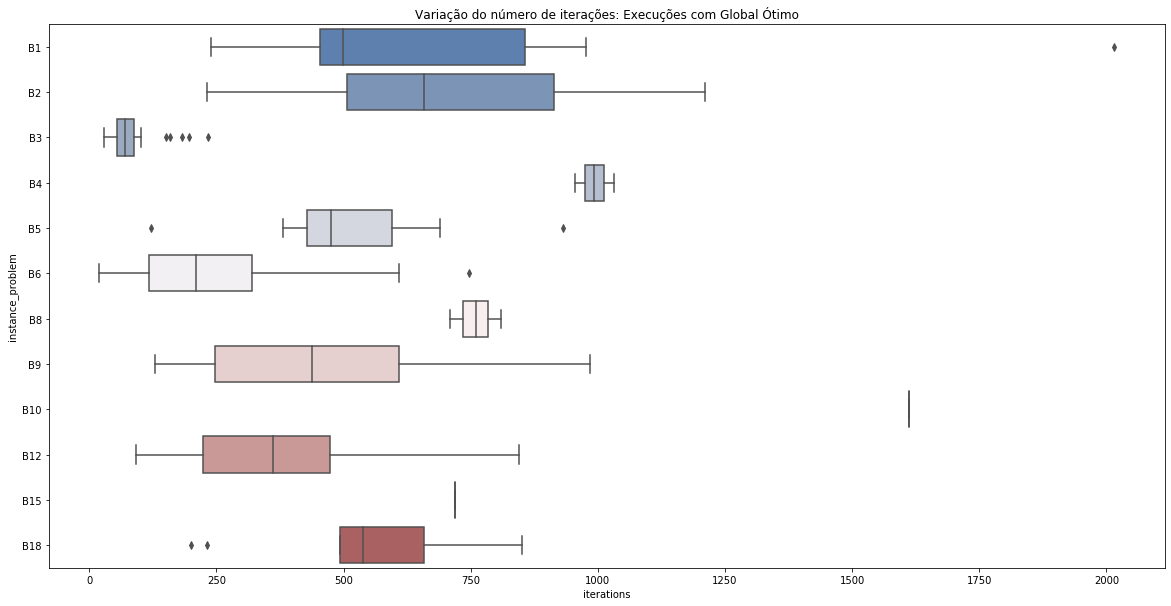

In [32]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do número de iterações: Execuções com Global Ótimo')

sns.boxplot(x="iterations", 
            y="instance_problem",            
            data=dfglobaloptimum,
            order= frame4.index,
            palette="vlag",
           )

In [33]:
frame4[["count", "graph", "run_time"]]

count     graph                                         \
                       nro_nodes nro_edges nro_terminals global_optimum   
instance_problem                                                          
B1                 6.0        50        63             9             82   
B2                23.0        50        63            13             83   
B3                30.0        50        63            25            138   
B4                 2.0        50       100             9             59   
B5                 8.0        50       100            13             61   
B6                28.0        50       100            25            122   
B8                 2.0        75        94            19            104   
B9                19.0        75        94            38            220   
B10                1.0        75       150            13             86   
B12               27.0        75       150            38            174   
B15                1.0       100       125            50            318   
B18                9.0       100       200            50            218   

                 run_time                         
                     mean    std     min     max  
instance_problem                                  
B1                  46.99  36.59   13.07  113.45  
B2                  39.57  17.62   13.09   74.15  
B3                   6.85   4.33    2.16   18.92  
B4                  61.98   0.72   61.47   62.49  
B5                  37.85  17.21    9.74   68.64  
B6                  24.40  17.65    1.96   71.10  
B8                  59.62   2.59   57.79   61.45  
B9                  53.78  29.63   16.08  115.82  
B10                134.98   0.00  134.98  134.98  
B12                 60.00  32.57   13.74  144.13  
B15                104.47   0.00  104.47  104.47  
B18                193.94  87.02   43.71  310.61

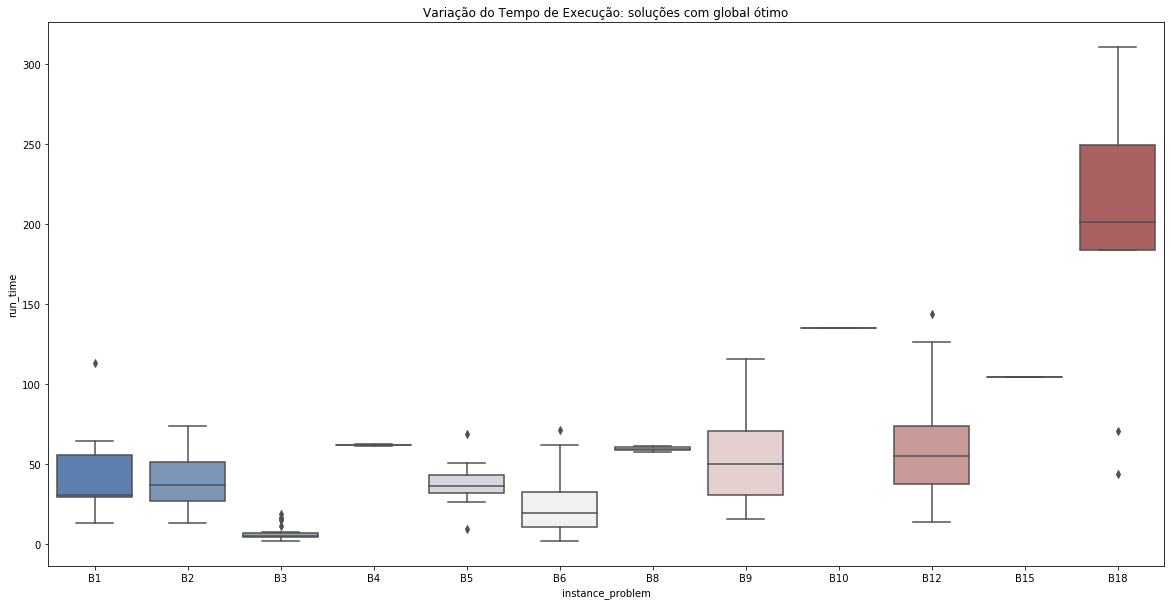

In [34]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do Tempo de Execução: soluções com global ótimo')
# sns.set(style="darkgrid")

sns.boxplot(y="run_time", 
            x="instance_problem",
            data=dfglobaloptimum,
            order= frame4.index,
            palette="vlag",
           )

In [35]:
def read_only_dataset(dataset, simulationfolder, filetemplate, mintrial=1, maxtrial=30):

    MAIN_FOLDER = os.path.join("..", "outputdata", simulationfolder)
    
    data_pieces = list() # anti pattern Initialize Than Modify
    for trial in range(mintrial,maxtrial+1):
        file = filetemplate.format(trial)
        df = pd.read_csv(os.path.join(MAIN_FOLDER, dataset, file))
        df['trial'] = str(trial)
        data_pieces.append(df)
    
    return pd.concat(data_pieces)

## Analizando o desempenho a cada iteração.

O arquivo `trial_{0}_evaluation.csv` mantém alguns dados de interesse para cada iteração de uma execução do algoritmo genético.

Os atributos são:
   - **iteration**: número da iteração (o melhor seria da geraç
   - **penalization**: quantidade de indivíduos que sofreram penalização - não mantém a média ou quantidade de penalizações.
   - **average**: fitness médio percebido durante a iteração;
   - **std_deviation**: desvio padrão do fitness na iteração.
    
O fitness, conforme abordado no trabalho original de Kapsalis (1993), é uma normalização do custo penalizado da simulação em relação ao maior custo encontrado em uma iteração, dado pela fórmula abaixo:

$$fitness_{ij} = MaxCusto_j - custo_{ij} $$



In [36]:
%%time
DATASET = "B13"
SIMULATION_FOLDER = "20200330_kapsalis_random"
file = "trial_{0}_evaluation.csv"

df_evaluation = read_only_dataset(DATASET, SIMULATION_FOLDER, file)


Wall time: 2.39 s


In [37]:
df_evaluation.columns

Index(['iteration', 'penalization', 'average', 'std_deviation', 'trial'], dtype='object')

In [38]:
df_evaluation['iteration'].max()

2459

In [39]:
bins = range(0,2501, 100)

intervals = pd.cut(df_evaluation['iteration'], bins, right=False)

groupped = df_evaluation.groupby(intervals)

In [40]:
groupped["penalization"].describe()

,count,mean,std,min,25%,50%,75%,max
iteration,,,,,,,,
"[0, 100)",3000.0,39.640333,37.090262,1.0,12.0,19.0,85.0,100.0
"[100, 200)",3000.0,13.291000,8.145046,0.0,9.0,12.0,16.0,100.0
"[200, 300)",3000.0,12.391000,5.708267,0.0,8.0,12.0,15.0,38.0
"[300, 400)",3000.0,13.400333,5.798213,1.0,9.0,13.0,17.0,41.0
"[400, 500)",3000.0,12.975667,5.879790,1.0,9.0,12.0,16.0,46.0
"[500, 600)",3000.0,13.264000,5.728168,0.0,9.0,12.0,17.0,51.0
"[600, 700)",3000.0,13.435000,5.734638,1.0,9.0,13.0,17.0,42.0
"[700, 800)",3000.0,13.498333,5.962705,1.0,9.0,13.0,17.0,44.0
"[800, 900)",2848.0,13.622191,5.927067,0.0,9.0,13.0,17.0,46.0


### Exemplo da variação de indivíduos penalizados em uma execução


Wall time: 22.6 s


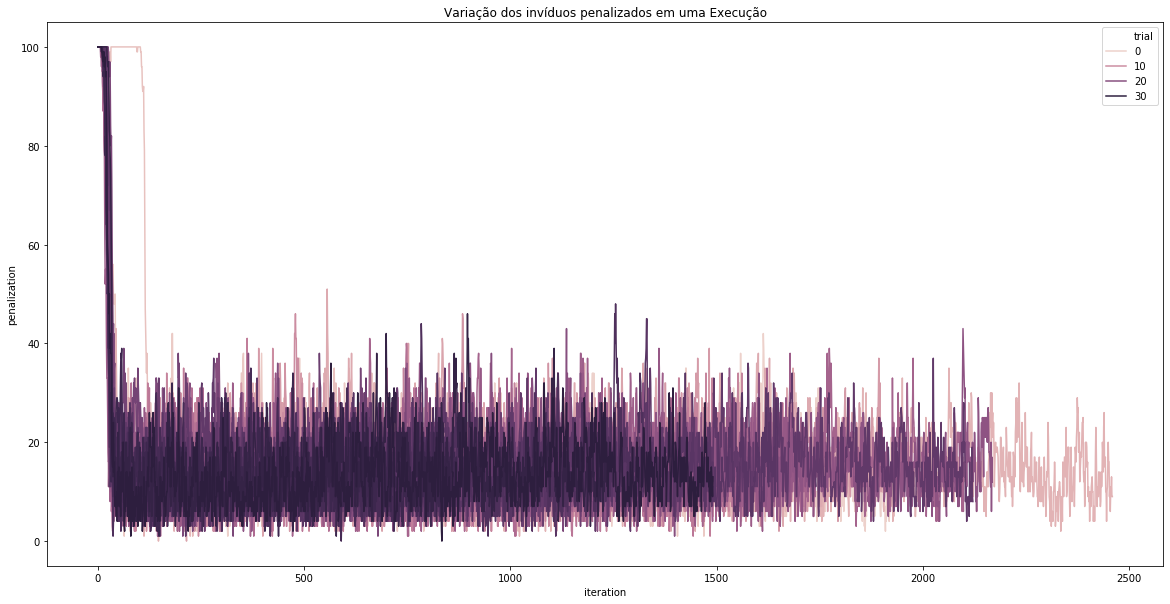

In [41]:
%%time
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="penalization",
                hue='trial',
                data=df_evaluation)

Wall time: 1.23 s


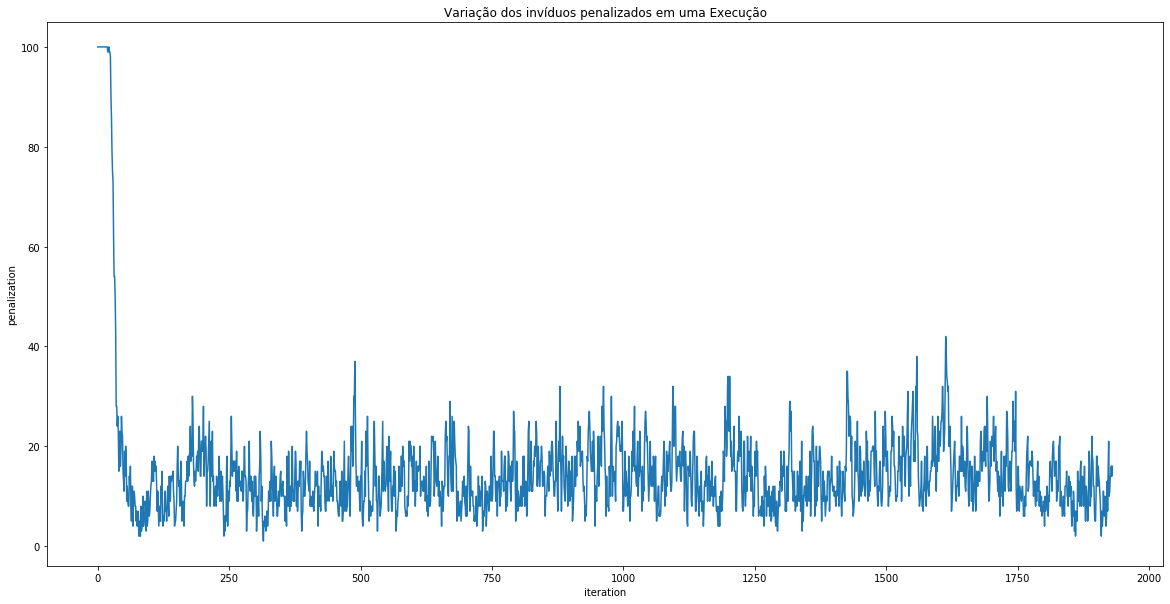

In [42]:
%%time
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="penalization",
                data=df_evaluation[df_evaluation["trial"] == '1'])

### Fitness médio observado em cada iteração

In [43]:
# Média do fitness para cada geração
groupped["average"].describe()

,count,mean,std,min,25%,50%,75%,max
iteration,,,,,,,,
"[0, 100)",3000.0,305.367883,218.227651,78.94,173.6700,239.730,346.8325,1505.78
"[100, 200)",3000.0,191.896153,66.348633,27.84,163.4700,179.025,242.5250,557.57
"[200, 300)",3000.0,184.696507,64.773735,24.31,158.5400,176.955,201.9525,528.49
"[300, 400)",3000.0,185.177760,61.348914,76.99,161.1575,177.330,213.1875,538.78
"[400, 500)",3000.0,183.327673,60.575381,77.36,160.3475,176.715,198.4275,453.22
"[500, 600)",3000.0,179.781953,57.933302,26.22,157.7500,175.555,194.1525,453.49
"[600, 700)",3000.0,179.480737,59.075681,83.03,155.6700,175.520,193.8975,453.27
"[700, 800)",3000.0,180.010340,59.083160,80.23,157.7250,175.750,192.5925,553.16
"[800, 900)",2848.0,177.981204,58.796130,24.32,155.8400,174.965,190.8775,463.64


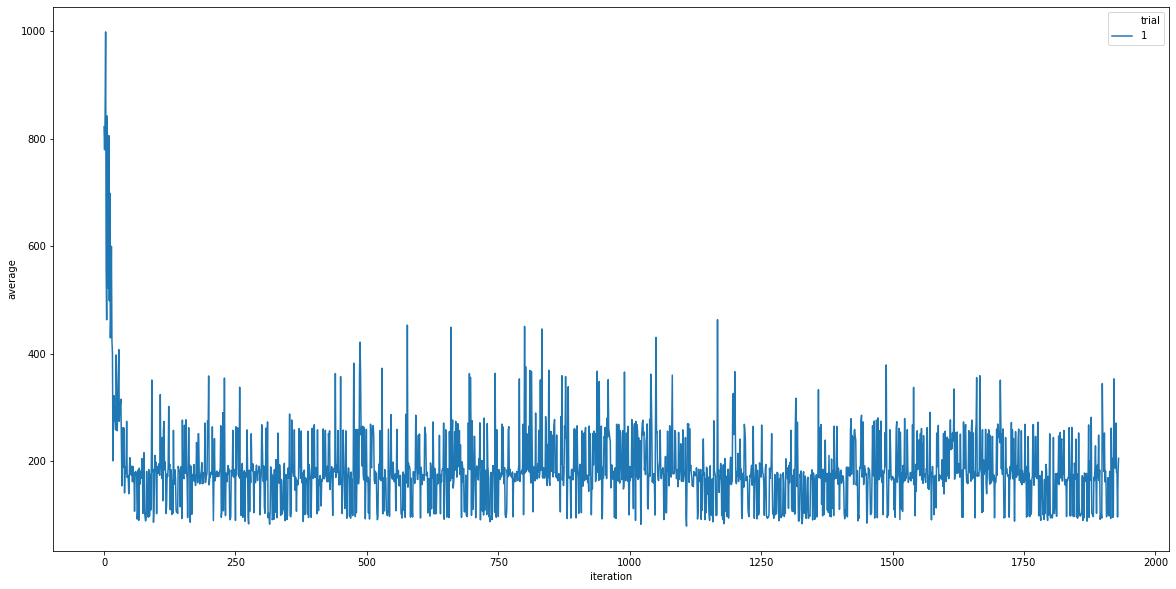

In [44]:
fig = plt.figure(figsize=(20, 10))
# plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="average",
                hue='trial',
                data=df_evaluation[df_evaluation["trial"] == '1'])

## Melhor resultado de cada iteração


A cada iteração (geração) é selecionado o indivíduo que apresenta o melhor fitness e custo. 
Esse índividuo é comparado com a melhor solução já obtida (`best_chromosome`) em uma tentativa de atualizar esse valor.

Os dados analisados se referem ao arquivo base `trial_{0}_best_from_round.csv`

In [45]:
%%time
DATASET = "B13"
SIMULATION_FOLDER = "20200330_kapsalis_random"
file = "trial_{0}_best_from_round.csv"

dfbest_round = read_only_dataset(DATASET,SIMULATION_FOLDER, file)

dfbest_round.head()

Wall time: 1.32 s


,iteration,cost,fitness,trial
0,0,900,1799,1
1,1,919,1570,1
2,2,919,1458,1
3,3,934,1471,1
4,4,642,1212,1


### Variação do melhor custo obtido a cada iteração (geração) ao longo de uma execução do GA.

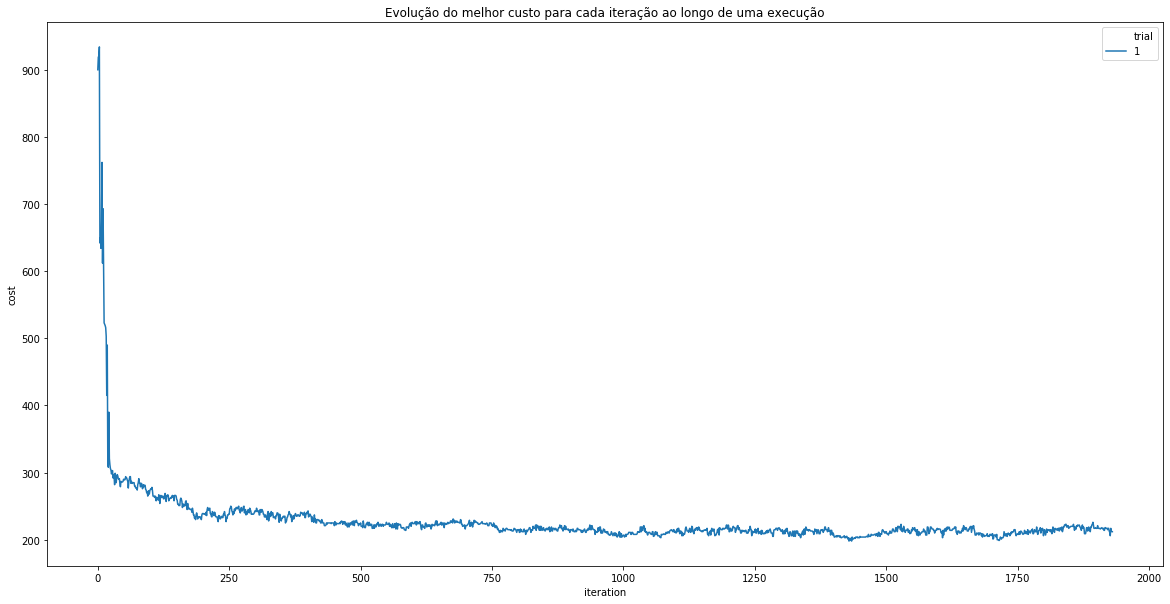

In [46]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Evolução do melhor custo para cada iteração ao longo de uma execução')

g = sns.lineplot(x="iteration",
                y="cost",
                hue='trial',
                data=dfbest_round[dfbest_round["trial"] == '1'])

### Variação do melhor fitness de cada iteração ao longo de uma execução do GA

Considerando que o fitness é calculado em relação a um custo máximo de cada iteração, a variação do fitness é mais errádico do que a variação do custo, conforme do exemplo anterior

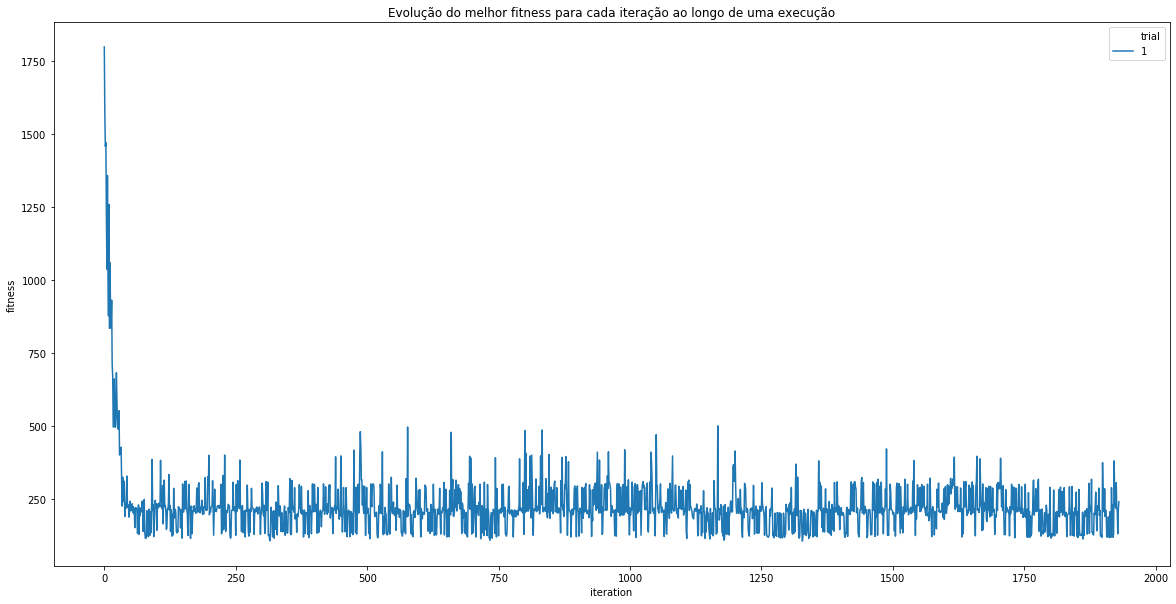

In [47]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Evolução do melhor fitness para cada iteração ao longo de uma execução')

# Lembrando que o fitness é uma normalização do custo em relação ao maior custo observado em uma iteração.
# fitness_(j i) = maior_custo_observado_j - custo_(j i)

g = sns.lineplot(x="iteration",
                y="fitness",
                hue='trial',
                data=dfbest_round[dfbest_round["trial"] == '1'])

## Atualização melhor do melhor custo

A cada atualização da melhor solução um registro é criado para o arquivo `trial_{0}_best_fitness.csv`.

O gráfico abaixo mostra a evolução do melhor custo global atingido ao longo de uma execução (trial).


In [48]:
%%time
DATASET = "B13"
SIMULATION_FOLDER = "20200330_kapsalis_random"
file = "trial_{0}_best_fitness.csv"

dfbest_fit = read_only_dataset(DATASET,SIMULATION_FOLDER, file)

# dfbest_fit.head()

Wall time: 1.12 s


Text(0.5, 0, 'Geração')

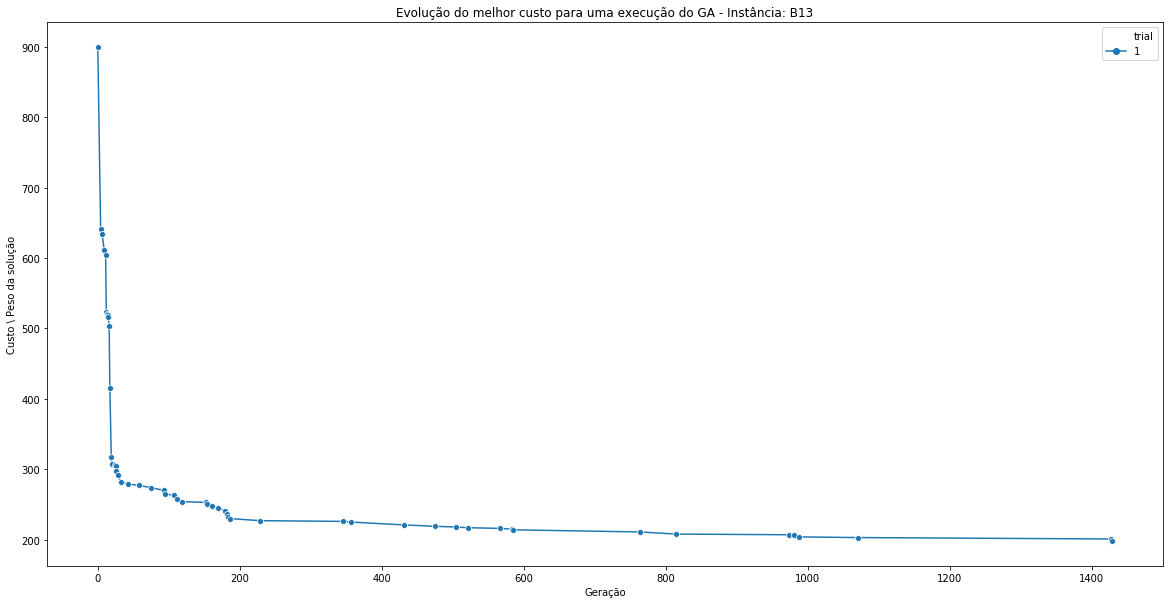

In [49]:
fig = plt.figure(figsize=(20, 10))


g = sns.lineplot(x="iteration",
                y="cost",
                hue="trial",
                style="trial",
                markers=True,
                data=dfbest_fit[dfbest_fit["trial"] == '1'])

plt.title(label=f'Evolução do melhor custo para uma execução do GA - Instância: {DATASET}')
plt.ylabel("Custo \ Peso da solução")
plt.xlabel("Geração")

In [50]:
df = dfbest_fit[dfbest_fit["trial"] == '1']

df.to_csv(os.path.join("..", "outputdata", "processed", "gabinario_bestfit_trial1.csv"))